In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("pca_results_m_10_tau_20_v2_27th_july/features.csv")

In [4]:
df.head()

,Time series,Ground Truth,Max Eigen Ratio,Variance of Eigen Ratio,Normalized Area Under Eigen Ratio,Eigen Ratio on Embedded Vectors
0,Lorenz,NON-ST,4105.394964,50238.852314,61.581529,4.685487
1,Phi,STOCHASTIC,6.732195,0.515617,21.482484,3.023748
2,Gamma,STOCHASTIC,11.482722,1.053084,23.210147,2.710518
3,Delta,STOCHASTIC,42.576419,9.749116,37.594542,6.075603
4,Kai,STOCHASTIC,5.607888,0.259323,8.653697,1.160874


In [28]:
synthetic_df =pd.read_csv("pca_results_synthetic_data_wn_log_map_27_july/features.csv")

In [29]:
synthetic_df.head()

,Time Series,Ground Truth,Max Eigen Ratio,Variance of Eigen Ratio,Normalized Area Under Eigen Ratio,Min Eigen Threshold Value
0,x00.085000,NON-STOCHASTIC,31.836322,19.797196,23.275565,7
1,x00.760000,NON-STOCHASTIC,35.009497,18.962542,26.131028,7
2,beta_0.000000_random_state_4,STOCHASTIC,7.262258,0.713882,13.000373,7
3,beta_0.000000_random_state_5,STOCHASTIC,6.293197,0.728952,13.248477,7
4,x00.910000,NON-STOCHASTIC,39.591240,20.771166,23.505116,7


In [30]:
pca_results_folder ="graphs"
import os
if not os.path.isdir(pca_results_folder):
    os.mkdir(pca_results_folder)

In [31]:
from utils import scatter_plot_2d

In [59]:
LABEL_NON_STOCHASTIC = "NON-STOCHASTIC"
LABEL_STOCHASTIC = "STOCHASTIC"
ground_truths =[]
data_dict = {}
max_value_dict = {}
gt_dictionary={}
ground_truth = [None] * synthetic_df.shape[0]
i = 0
for row in synthetic_df.iterrows():
    print(row)
    file = row[1]["Time Series"]
    print(file)
    if file.startswith("l") or file.startswith("a") or file.startswith("x") :
        ground_truths.append(LABEL_NON_STOCHASTIC)
    else:
        ground_truths.append(LABEL_STOCHASTIC)
    gt_dictionary[file] = ground_truths[-1]
    ground_truth[i] =gt_dictionary[file]
    i += 1


(0, Time Series                              x00.085000
Ground Truth                         NON-STOCHASTIC
Max Eigen Ratio                           31.836322
Variance of Eigen Ratio                   19.797196
Normalized Area Under Eigen Ratio         23.275565
Min Eigen Threshold Value                         7
Name: 0, dtype: object)
x00.085000
(1, Time Series                              x00.760000
Ground Truth                         NON-STOCHASTIC
Max Eigen Ratio                           35.009497
Variance of Eigen Ratio                   18.962542
Normalized Area Under Eigen Ratio         26.131028
Min Eigen Threshold Value                         7
Name: 1, dtype: object)
x00.760000
(2, Time Series                          beta_0.000000_random_state_4
Ground Truth                                           STOCHASTIC
Max Eigen Ratio                                          7.262258
Variance of Eigen Ratio                                  0.713882
Normalized Area Under Eigen Ra

In [10]:
gt_dictionary 

{'x00.085000': 'NON-STOCHASTIC',
 'x00.760000': 'NON-STOCHASTIC',
 'beta_0.000000_random_state_4': 'STOCHASTIC',
 'beta_0.000000_random_state_5': 'STOCHASTIC',
 'x00.910000': 'NON-STOCHASTIC',
 'beta_0.000000_random_state_7': 'STOCHASTIC',
 'beta_0.000000_random_state_6': 'STOCHASTIC',
 'x00.310000': 'NON-STOCHASTIC',
 'beta_0.000000_random_state_10': 'STOCHASTIC',
 'beta_0.000000_random_state_2': 'STOCHASTIC',
 'beta_0.000000_random_state_3': 'STOCHASTIC',
 'x00.685000': 'NON-STOCHASTIC',
 'beta_0.000000_random_state_11': 'STOCHASTIC',
 'x00.160000': 'NON-STOCHASTIC',
 'beta_0.000000_random_state_1': 'STOCHASTIC',
 'beta_0.000000_random_state_0': 'STOCHASTIC',
 'beta_0.000000_random_state_12': 'STOCHASTIC',
 'x00.610000': 'NON-STOCHASTIC',
 'x00.460000': 'NON-STOCHASTIC',
 'x00.535000': 'NON-STOCHASTIC',
 'beta_0.000000_random_state_8': 'STOCHASTIC',
 'beta_0.000000_random_state_9': 'STOCHASTIC',
 'x00.385000': 'NON-STOCHASTIC',
 'x00.235000': 'NON-STOCHASTIC',
 'x00.835000': 'NON-STO

In [60]:
distinct_labels = [LABEL_STOCHASTIC, LABEL_NON_STOCHASTIC]

labels = [1] * synthetic_df.shape[0]
for i, gt in enumerate(ground_truth):
    if gt == LABEL_STOCHASTIC:
        labels[i] = 1
    else:
        labels[i] = 2

In [61]:
labels = [1] * df.shape[0]
i = 0
for row in df.iterrows():
    if row[1]["Ground Truth"] == "STOCHASTIC":
       labels[i] = 1
    else:
        labels[i] = 2
    i += 1

In [62]:
df.head()

,Time series,Ground Truth,Max Eigen Ratio,Variance of Eigen Ratio,Normalized Area Under Eigen Ratio,Eigen Ratio on Embedded Vectors
0,Lorenz,NON-ST,4105.394964,50238.852314,61.581529,4.685487
1,Phi,STOCHASTIC,6.732195,0.515617,21.482484,3.023748
2,Gamma,STOCHASTIC,11.482722,1.053084,23.210147,2.710518
3,Delta,STOCHASTIC,42.576419,9.749116,37.594542,6.075603
4,Kai,STOCHASTIC,5.607888,0.259323,8.653697,1.160874


Entire data [[4105.39496416   61.58152851]
 [   6.73219522   21.48248438]
 [  11.48272197   23.21014709]
 [  42.576419     37.59454201]
 [   5.60788817    8.65369697]
 [   9.21734842    7.51144266]
 [ 214.28088382   61.60626896]
 [ 577.95424014   83.21749495]
 [  29.27030785   39.67425755]
 [  57.56015563   50.25067802]
 [ 621.32030896  450.07392883]
 [  56.27518272   17.31917792]
 [ 755.88299868  206.64431068]
 [  32.33352521   22.9286501 ]]
 Ploted scatter plot


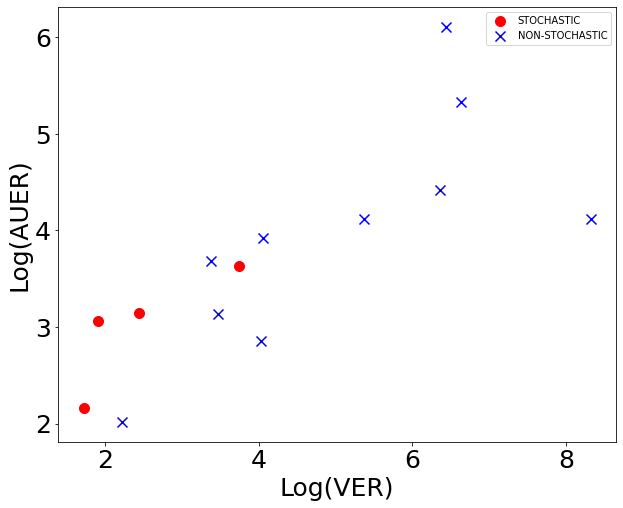

In [63]:
features = df[["Max Eigen Ratio", "Normalized Area Under Eigen Ratio"]].values
scatter_plot_2d(features, labels, pca_results_folder, "max_eig_ratio_area",
                title="Max Eigen Ratio and  Area",
                legends= distinct_labels,
                axis_labels=features,
                log_axis=True)

In [88]:
def scatter_plot_2d_combined(data: dict, real_data,
                    labels, rlabels, out_folder, file_name, title=None, legends=None, axis_labels=None, log_axis = False):
    print("Entire data",data)
    cdict = {1: 'red', 2: 'blue'}
    mdict = {1: 'o',  2: 'x'}
    plt.figure(figsize=(10,8))
    if log_axis:
        xy = np.log(data)
    else:
        xy = data
        
    if log_axis:
        rxy = np.log(real_data)
    else:
        rxy = real_data
        
    print(labels)
    for g in np.unique(labels):
        ix = np.where(labels == g)
        print(g, xy)
        print(xy[ix, 0], xy[ix, 1], cdict[g], mdict[g], legends)
        plt.scatter(xy[ix, 0], xy[ix, 1], c=cdict[g], marker = mdict[g], label="Real Data" + legends[g - 1])
        

    for g in np.unique(rlabels):
        rix = np.where(labels == g)
#         print(g, xy)
#         print(xy[ix, 0], xy[ix, 1], cdict[g], mdict[g], legends)
        plt.scatter(rxy[rix, 0], rxy[rix, 1], c=cdict[g], marker = 'v', label="Synthetic Data " +legends[g - 1], s=100)


    plt.legend()
#    plt.title(title)
    xlabel = axis_labels[0]
    ylabel = axis_labels[1]
    if log_axis:
        xlabel = f"Log(VER)"
        ylabel = f"Log((AUER))"

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"{out_folder}/{file_name}.jpg", bbox_inches="tight")
    print(" Ploted scatter plot")

Entire data [[4105.39496416   61.58152851]
 [   6.73219522   21.48248438]
 [  11.48272197   23.21014709]
 [  42.576419     37.59454201]
 [   5.60788817    8.65369697]
 [   9.21734842    7.51144266]
 [ 214.28088382   61.60626896]
 [ 577.95424014   83.21749495]
 [  29.27030785   39.67425755]
 [  57.56015563   50.25067802]
 [ 621.32030896  450.07392883]
 [  56.27518272   17.31917792]
 [ 755.88299868  206.64431068]
 [  32.33352521   22.9286501 ]]
[2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1 [[8.32005723 4.12036196]
 [1.90690127 3.06723792]
 [2.44084347 3.14458956]
 [3.75130056 3.62685888]
 [1.72417421 2.15798662]
 [2.22108741 2.01642755]
 [5.3672877  4.12076363]
 [6.3594947  4.4214576 ]
 [3.37657362 3.68070255]
 [4.05283059 3.91702404]
 [6.43184674 6.10941186]
 [4.03025363 2.85181444]
 [6.6278866  5.33099901]
 [3.47610462 3.13238722]]
[[1.90690127 2.44084347 3.75130056 1.72417421]] [[3.06723792 3.14458956 3.62685888 2.15798662]] red o ['STOCHASTIC', 'NON-STOCHASTIC']
2 [[8.32005723 4.12036

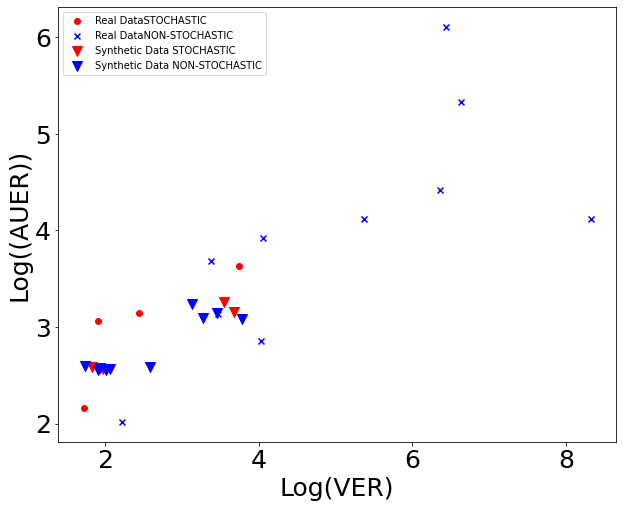

In [89]:
features = df[["Max Eigen Ratio", "Normalized Area Under Eigen Ratio"]].values
rfeatures = synthetic_df[["Max Eigen Ratio", "Normalized Area Under Eigen Ratio"]].values

scatter_plot_2d_combined(features,rfeatures,labels, rlabels, pca_results_folder, "max_eig_ratio_area",
                title="Max Eigen Ratio and  Area",
                legends= distinct_labels,
                axis_labels=features,
                log_axis=True)

In [87]:
synthetic_df.head(30)

,Time Series,Ground Truth,Max Eigen Ratio,Variance of Eigen Ratio,Normalized Area Under Eigen Ratio,Min Eigen Threshold Value
0,x00.085000,NON-STOCHASTIC,31.836322,19.797196,23.275565,7
1,x00.760000,NON-STOCHASTIC,35.009497,18.962542,26.131028,7
2,beta_0.000000_random_state_4,STOCHASTIC,7.262258,0.713882,13.000373,7
3,beta_0.000000_random_state_5,STOCHASTIC,6.293197,0.728952,13.248477,7
4,x00.910000,NON-STOCHASTIC,39.591240,20.771166,23.505116,7
5,beta_0.000000_random_state_7,STOCHASTIC,6.761486,0.684928,12.869075,7
6,beta_0.000000_random_state_6,STOCHASTIC,7.889476,0.677282,12.949601,7
7,x00.310000,NON-STOCHASTIC,44.184350,32.130691,21.738964,7
8,beta_0.000000_random_state_10,STOCHASTIC,7.539724,0.753024,12.829146,7
9,beta_0.000000_random_state_2,STOCHASTIC,13.378101,0.908204,13.225815,7


In [41]:
rlabels = [1] * synthetic_df.shape[0]
i = 0
for row in synthetic_df.iterrows():
    gt = row[1]["Ground Truth"]
    print(row[1]["Time Series"], gt)
    if gt == "STOCHASTIC":
        rlabels[i] = 1
    else:
        rlabels[i] = 2
    print(row[1]["Time Series"], gt, rlabels[i])
    i += 1 


x00.085000 NON-STOCHASTIC
x00.085000 NON-STOCHASTIC 2
x00.760000 NON-STOCHASTIC
x00.760000 NON-STOCHASTIC 2
beta_0.000000_random_state_4 STOCHASTIC
beta_0.000000_random_state_4 STOCHASTIC 1
beta_0.000000_random_state_5 STOCHASTIC
beta_0.000000_random_state_5 STOCHASTIC 1
x00.910000 NON-STOCHASTIC
x00.910000 NON-STOCHASTIC 2
beta_0.000000_random_state_7 STOCHASTIC
beta_0.000000_random_state_7 STOCHASTIC 1
beta_0.000000_random_state_6 STOCHASTIC
beta_0.000000_random_state_6 STOCHASTIC 1
x00.310000 NON-STOCHASTIC
x00.310000 NON-STOCHASTIC 2
beta_0.000000_random_state_10 STOCHASTIC
beta_0.000000_random_state_10 STOCHASTIC 1
beta_0.000000_random_state_2 STOCHASTIC
beta_0.000000_random_state_2 STOCHASTIC 1
beta_0.000000_random_state_3 STOCHASTIC
beta_0.000000_random_state_3 STOCHASTIC 1
x00.685000 NON-STOCHASTIC
x00.685000 NON-STOCHASTIC 2
beta_0.000000_random_state_11 STOCHASTIC
beta_0.000000_random_state_11 STOCHASTIC 1
x00.160000 NON-STOCHASTIC
x00.160000 NON-STOCHASTIC 2
beta_0.000000_ra

In [112]:
import math

In [113]:
rlabels

[2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2]

In [150]:
import numpy as np
import matplotlib as mpl


def scatter_plot_2d(data: dict,
                    labels, out_folder, file_name, title=None, legends=None, axis_labels=None, log_axis = False):
    print("Entire data",data)
    cdict = {1: 'red', 2: 'blue'}
    mdict = {1: 'o',  2: 'x'}
    plt.figure(figsize=(10,8))
    plt.rc('axes', labelsize=25)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    plt.rc('legend', fontsize=20)
    mpl.rcParams['axes.linewidth'] = 2 #set the value globally


    if log_axis:
        xy = np.log(data)
    else:
        xy = data
    for g in np.unique(labels):
        ix = np.where(labels == g)
        plt.scatter(xy[ix, 0], xy[ix, 1], c=cdict[g], marker = mdict[g], label=legends[g - 1], s= 100)

    plt.legend()
#    plt.title(title)
    xlabel = axis_labels[0]
    ylabel = axis_labels[1]
    if log_axis:
        xlabel = f"Log(VER)"
        ylabel = f"Log(AUER)"
        
    plt.plot([1.5, 4],[3, 2.5], "k--", linewidth=2)
    plt.xlabel(xlabel)
    plt.xticks([1.5,2,2,5,3,3,5,4,4,5])
    plt.ylabel(ylabel)
   # plt.savefig(f"{out_folder}/{file_name}.jpg", bbox_inches="tight")
    print(" Ploted scatter plot")

Entire data [[31.83632213 23.27556529]
 [35.00949704 26.1310277 ]
 [ 7.26225835 13.00037264]
 [ 6.29319709 13.24847709]
 [39.59123968 23.50511598]
 [ 6.76148609 12.86907529]
 [ 7.88947563 12.94960142]
 [44.18434966 21.73896439]
 [ 7.53972405 12.82914607]
 [13.37810094 13.22581544]
 [ 6.96312257 13.18377094]
 [22.83699822 25.54527601]
 [ 5.67983556 13.44991315]
 [26.34292836 22.09014328]
 [ 7.02951107 12.70322448]
 [ 6.80940937 13.44235107]
 [ 6.6796434  12.66293472]
 [16.79097297 19.40240094]
 [31.1534359  24.23235103]
 [85.87975366 27.21478121]
 [ 8.86575624 13.55970715]
 [10.36124988 13.01024637]
 [36.067276   19.76828882]
 [62.2625565  27.47839123]
 [34.56889057 19.37677307]]
 Ploted scatter plot


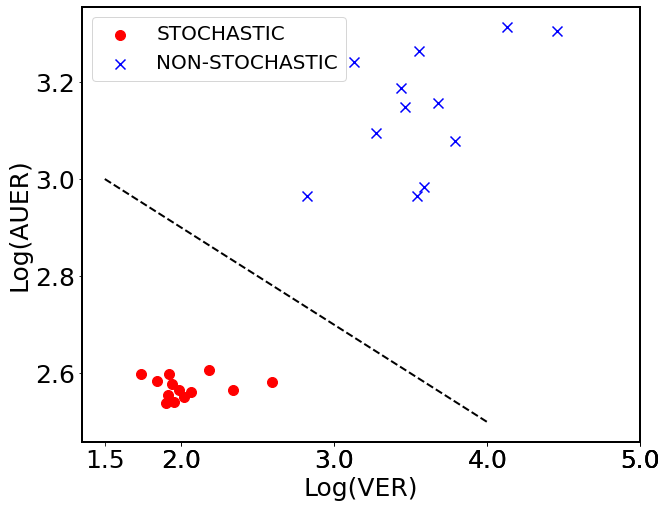

In [151]:
features = synthetic_df[["Max Eigen Ratio", "Normalized Area Under Eigen Ratio"]].values
scatter_plot_2d(features, rlabels, pca_results_folder, "max_eig_ratio_area",
                title="Max Eigen Ratio and  Area",
                legends= distinct_labels,
                axis_labels=features,
                log_axis=True)

In [34]:
rlabels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
threshold_df = pd.read_csv("pca_results_m_10_tau_20_v2_15th_june/threshold_vs_silhoutte_score.csv")

In [18]:
threshold_df.head()

,Threshold,K means silhouette score
0,5,0.814859
1,6,0.842795
2,7,0.849157
3,8,0.937656
4,9,0.953543


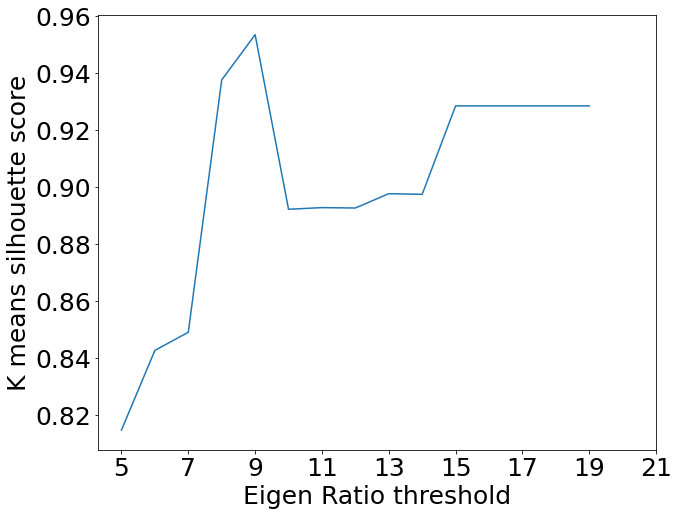

In [26]:
plt.figure(figsize=(10,8))
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
    
plt.plot(threshold_df["Threshold"], threshold_df["K means silhouette score"])
plt.xlabel("Eigen Ratio threshold")
plt.ylabel("K means silhouette score")
plt.xticks([5,7,9,11,13,15,17,19,21])
plt.savefig(f"{pca_results_folder}/threshold_vs_silhoutte_score.jpg", bbox_inches="tight")